<a href="https://colab.research.google.com/github/littlefieldnick/3D-Medical-Imaging/blob/master/3D_Medical_Image_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import torch
import os

# Milestone #1: Training and Validation Setup
Workflow

- Download the training and validation data.
Note that this the uncompressed dataset in the introduction.
- Open a pair of T1-w and T2-w images (the first six characters of the filename identifies a unique subject).
- Plot a slice of the 3D image volume to the screen from both images and verify that the anatomy approximately aligns.

In [3]:
!unzip '/content/drive/My Drive/3D Medical Imaging Analysis/small_data.zip'

Archive:  /content/drive/My Drive/3D Medical Imaging Analysis/small_data.zip
   creating: small/
   creating: small/t1/
  inflating: small/t1/IXI102-HH-1416-T1_fcm.nii.gz  
  inflating: small/t1/IXI104-HH-1450-T1_fcm.nii.gz  
  inflating: small/t1/IXI105-HH-1471-T1_fcm.nii.gz  
  inflating: small/t1/IXI126-HH-1437-T1_fcm.nii.gz  
  inflating: small/t1/IXI127-HH-1451-T1_fcm.nii.gz  
  inflating: small/t1/IXI128-HH-1470-T1_fcm.nii.gz  
  inflating: small/t1/IXI130-HH-1528-T1_fcm.nii.gz  
  inflating: small/t1/IXI131-HH-1527-T1_fcm.nii.gz  
  inflating: small/t1/IXI132-HH-1415-T1_fcm.nii.gz  
  inflating: small/t1/IXI136-HH-1452-T1_fcm.nii.gz  
  inflating: small/t1/IXI137-HH-1472-T1_fcm.nii.gz  
  inflating: small/t1/IXI146-HH-1389-T1_fcm.nii.gz  
  inflating: small/t1/IXI148-HH-1453-T1_fcm.nii.gz  
  inflating: small/t1/IXI150-HH-1550-T1_fcm.nii.gz  
  inflating: small/t1/IXI159-HH-1549-T1_fcm.nii.gz  
  inflating: small/t1/IXI160-HH-1637-T1_fcm.nii.gz  
  inflating: small/t1/IXI161-HH-

In [4]:
def load_image(t1_file, t2_file):
  """
  Load a give T1-w and T2-w pair

  Args:
    - t1_file: Path to T1-w image
    - t2_file: Path to T2-w image

  Returns:
    (t1, t2): tuple containing loaded T1-w and T2-w images
  """

  t1, t2 = nib.load(t1_file).get_fdata(), nib.load(t2_file).get_fdata()

  return (t1, t2)

In [5]:
t1_pth = "/content/small/t1/IXI102-HH-1416-T1_fcm.nii.gz"
t2_pth = "/content/small/t2/IXI102-HH-1416-T2_reg_fcm.nii.gz"

In [74]:
t1, t2 = load_image(t1_pth, t2_pth)

In [75]:
t1.shape, t2.shape

((120, 120, 90), (120, 120, 90))

In [8]:
def display_axial_view(t1, t2, slice):
  """
  Display the axial view for T1 and T2 images for a given slice

  Args:
    - t1: T1-w Image
    - t2: T2-w Image
    - slice: The slice of the axial view to display
  """

  f, ax = plt.subplots(1, 2)
  ax[0].imshow(t1[:, :, slice], cmap="gray"); ax[1].imshow(t2[:, :, slice], cmap="gray")
  ax[0].set_title("T1", fontsize=18); ax[1].set_title("T2", fontsize=18)
  ax[0].axis("off"); ax[1].axis("off")


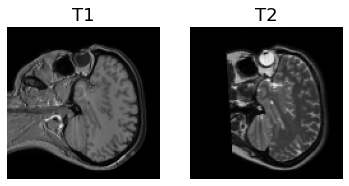

In [9]:
display_axial_view(t1, t2, 60)

# Milestone #2: Datasets and Transforms

Workflow

- Create a function that takes a tuple of two images and returns a tuple of the same two cropped (or, equivalently, a patch from the) images, where the cropped images are of the same randomly determined location.

- Verify that this was implemented correctly by visualizing the output images as in the previous module.
Create a class that inherits from Dataset to handle the NIfTI files. Implement the following methods:

  - `__init__`

  - `__len__`

  - `__getitem__`


In [ ]:
from torch.utils.data.dataset import Dataset


class NiftiDataset(Dataset):
    def load_image(t1_file, t2_file):
    """
    Load a give T1-w and T2-w pair

    Args:
      - t1_file: Path to T1-w image
      - t2_file: Path to T2-w image

    Returns:
      (t1, t2): tuple containing loaded T1-w and T2-w images
    """

    t1, t2 = nib.load(t1_file).get_fdata(), nib.load(t2_file).get_fdata()

    return (t1, t2)

    def __init__(self, source_dir, target_dir, transforms=None):

        self.source_dir = source_dir # T1-w images
        self.target_dir = target_dir # T2-w images

        self.transforms = transforms

        self.t1_w = []
        self.t2_w = []

        for t1, t2 in zip(os.listdir(self.source_dir), os.listdir(self.target_dir)):
          t1_data, t2_data = load_image(t1, t2)
          self.t1_w.append(t1_data)
          self.t2_w.append(t2_data)
        
        System.out.println("Loaded", len(self.t1_w), "T1-w images and ", len(self.t2_w), "T2-w images.")

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        t1 = self.t1_w[i]
        t2 = self.t2_w[i]

        if self.transform: return self.transform(t1, t2)

        return (t1, t2)



In [162]:
class RandomCrop3D:
  def __init__(self, output_size):
    assert isinstance(output_size, (int, tuple))
    if isinstance(output_size, int):
      self.output_size = (output_size, output_size, output_size)
    else:
      assert len(output_size) == 3
      self.output_size = output_size
    print("Output Size set to:", self.output_size)

  def __call__(self, sample):
    t1, t2 = sample

    assert t1.shape == t2.shape, ("T1-w and T2-w images are not the same size")

    x, y, z = t1.shape
    if t1.shape == self.output_size:
      x0, y0, z0 =  np.random.randint(low=0, high=x), np.random.randint(low=0, high=y), np.random.randint(low=0, high=z)
    else:
      x0 = np.random.randint(low=0, high=x - self.output_size[0])
      y0 = np.random.randint(low=0, high=y - self.output_size[1])
      z0 = np.random.randint(low=0, high=z - self.output_size[2])

    crop_t1 = t1[x0: (x + x0), y0: (y+y0), z0: (z+z0)]
    crop_t2 = t2[x0: (x + x0), y0: (y+y0), z0: (z+z0)]

    return (crop_t1, crop_t2)

In [169]:
trans = RandomCrop3D(t1.shape)
t1_crop, t2_crop = trans((t1, t2))
print(t1.shape, t2.shape)
t1_crop.shape, t2_crop.shape

Output Size set to: (120, 120, 90)
(120, 120, 90) (120, 120, 90)


((32, 27, 63), (32, 27, 63))

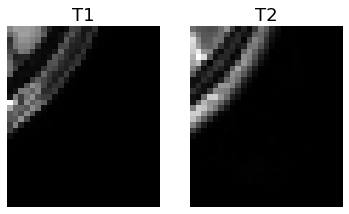

In [170]:
display_axial_view(t1_crop, t2_crop, 9)